# Real Estate Pricing Predictions


## Aim
Housing prices for Taipei City for a certain time interval was taken into account. The factors
affecting the prices of houses in that part of the city were carefully noted. These were
1. Transaction_date
2. House_age
3. Nearest_MRT_station
4. Convenient_stores
5. Latitude
6. Longitude

These factors were responsible for certain housing_price in the city.
The city wants to analyze the growth of the city in terms of future housing prices. The task here is  to help the city officials understand the dataset better and develop a machine learning model to predict housing prices in future.

### Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Datasets

In [2]:
#importing datasets
house_data = pd.read_csv("Real estate valuation (1).csv")
house_data.head()

,No,Transaction_date,House_age,Nearest_MRT_station,Convenient_stores,latitude,longitude,Housing_price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Finding the missing values

In [3]:
#finding the missing values
house_data.isna().sum()

No                     0
Transaction_date       0
House_age              0
Nearest_MRT_station    0
Convenient_stores      0
latitude               0
longitude              0
Housing_price          0
dtype: int64

In [4]:
#There are no missing values

### Describing House Data

In [5]:
house_data.describe()

,No,Transaction_date,House_age,Nearest_MRT_station,Convenient_stores,latitude,longitude,Housing_price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
house_data.dtypes

No                       int64
Transaction_date       float64
House_age              float64
Nearest_MRT_station    float64
Convenient_stores        int64
latitude               float64
longitude              float64
Housing_price          float64
dtype: object

In [7]:
len(house_data)

414

In [8]:
house_data.shape

(414, 8)

### Finding Outliers in all Independent feature variables through scatterplot

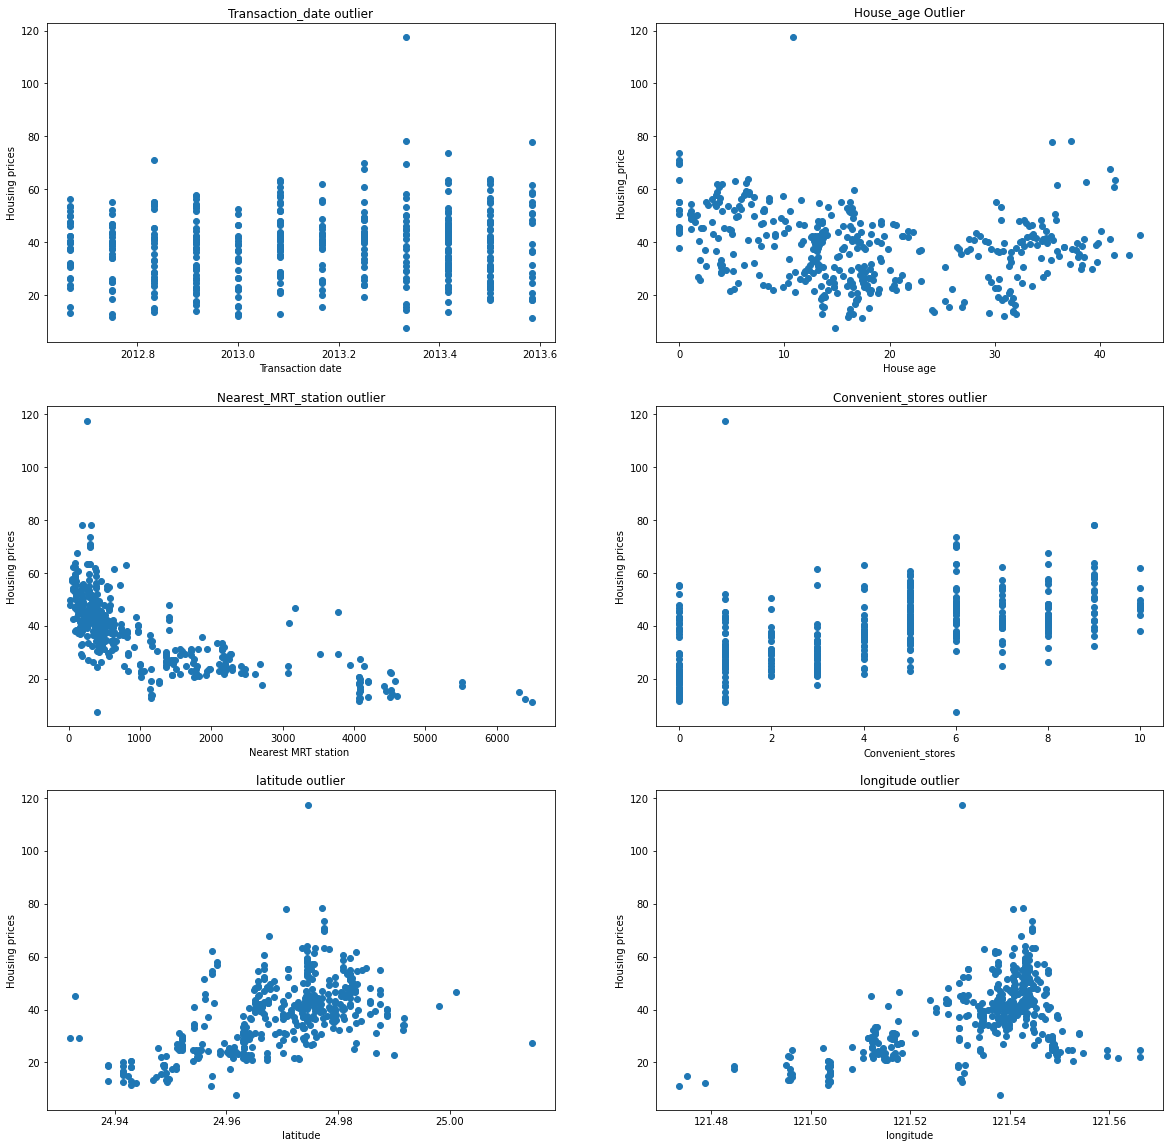

In [9]:
#Finding outliers in all independent feature variables
fig,((ax00,ax01),
     (ax10,ax11),
     (ax20,ax21)) = plt.subplots(3, 2, figsize=(20, 20))

#finding outliers of Transaction_date wrt Housing prices
ax00.scatter(x=house_data["Transaction_date"],y=house_data["Housing_price"])
ax00.set(title="Transaction_date outlier",xlabel="Transaction date",ylabel = "Housing prices")

# finding outliers of house_age wrt Housing_prices
ax01.scatter(x=house_data["House_age"],y = house_data["Housing_price"])
ax01.set(title="House_age Outlier",xlabel="House age",ylabel="Housing_price")


#finding outliers of Nearest_MRT_station wrt Housing prices
ax10.scatter(x=house_data["Nearest_MRT_station"],y=house_data["Housing_price"])
ax10.set(title="Nearest_MRT_station outlier",xlabel="Nearest MRT station ",ylabel = "Housing prices")

#finding outliers of Convenient_stores wrt Housing prices
ax11.scatter(x=house_data["Convenient_stores"],y=house_data["Housing_price"])
ax11.set(title="Convenient_stores outlier",xlabel="Convenient_stores",ylabel = "Housing prices")

#finding outliers of latitude wrt Housing prices
ax20.scatter(x=house_data["latitude"],y=house_data["Housing_price"])
ax20.set(title="latitude outlier",xlabel="latitude",ylabel = "Housing prices")


#finding outliers of longitude wrt Housing prices
ax21.scatter(x=house_data["longitude"],y=house_data["Housing_price"])
ax21.set(title="longitude outlier",xlabel="longitude",ylabel = "Housing prices");




### Checking type of Data Distribution with the help of histogram

In [10]:
#histogram plots of independent feature variable to check type of data distribution

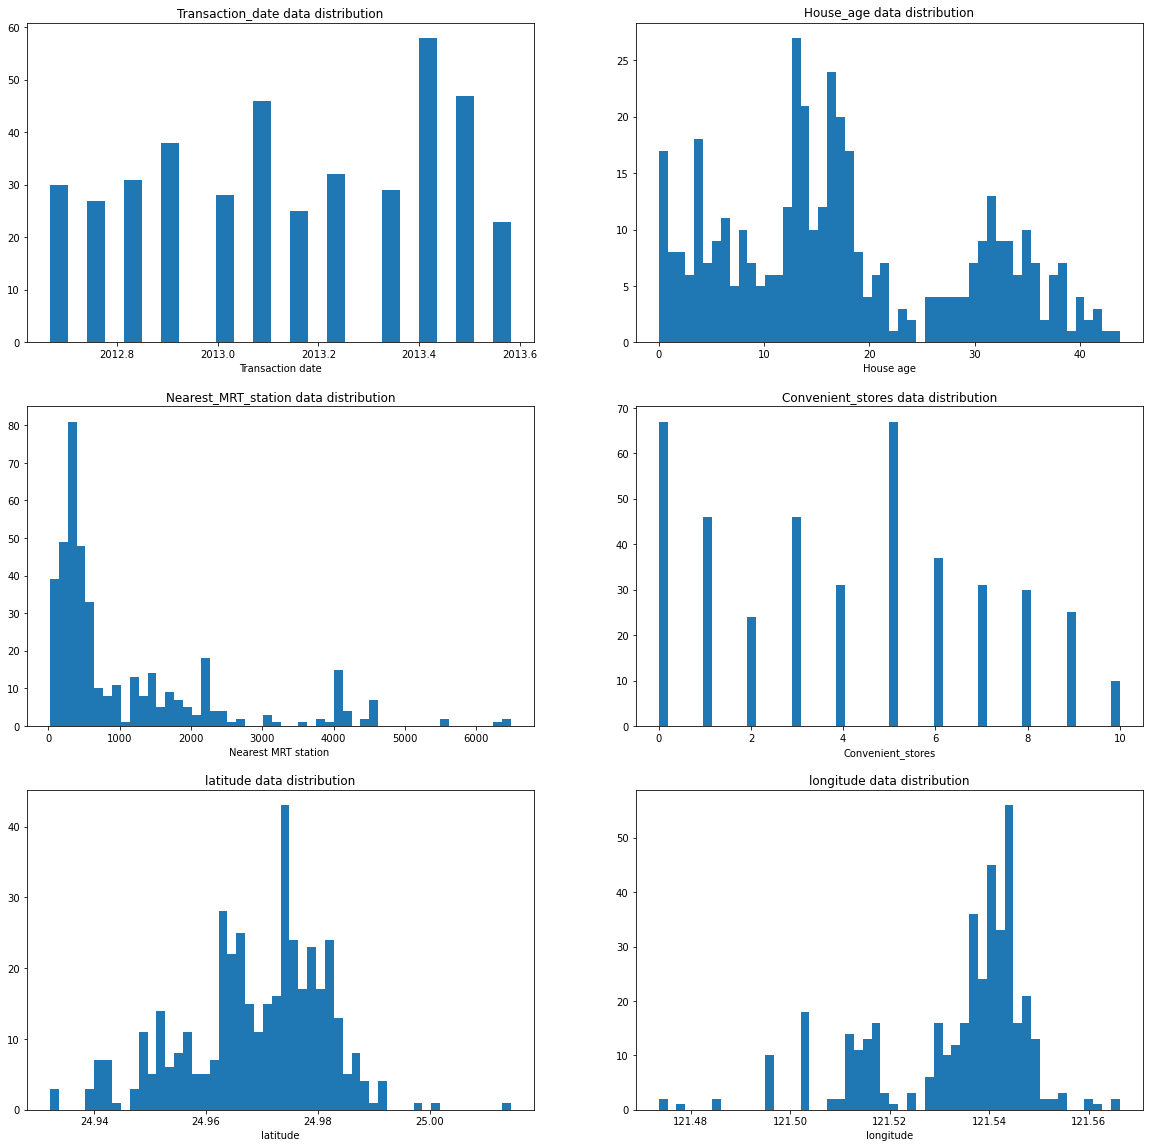

In [11]:
fig,((ax00,ax01),
     (ax10,ax11),
     (ax20,ax21)) = plt.subplots(3, 2, figsize=(20, 20))

#finding data distribution of  Transaction_date 
ax00.hist(x=house_data["Transaction_date"],bins=25)
ax00.set(title="Transaction_date data distribution",xlabel="Transaction date")

# finding data distribution of house_age 
ax01.hist(x=house_data["House_age"],bins=52)
ax01.set(title="House_age data distribution",xlabel="House age")


#finding data distribution of Nearest_MRT_station 

ax10.hist(x=house_data["Nearest_MRT_station"],bins=52)
ax10.set(title="Nearest_MRT_station data distribution",xlabel="Nearest MRT station ")

#finding data distribution  of Convenient_stores
ax11.hist(x=house_data["Convenient_stores"],bins=52)
ax11.set(title="Convenient_stores data distribution",xlabel="Convenient_stores")

#finding data distribution  of latitude 
ax20.hist(x=house_data["latitude"],bins=52)
ax20.set(title="latitude data distribution",xlabel="latitude")


#finding data distribution  of longitude 
ax21.hist(x=house_data["longitude"],bins=52)
ax21.set(title="longitude data distribution",xlabel="longitude");

## linear regression assumptions :


In [12]:
#1.Linearity - linear relationship between independent and dependent variables
#2.Homoscedascity - The residuals or errors are equal across the regression line
#3.Lack of multicollinearity-lack of linear relationship between independant variables

#### 1.   Finding Linear Relationship between dependent and independent variables

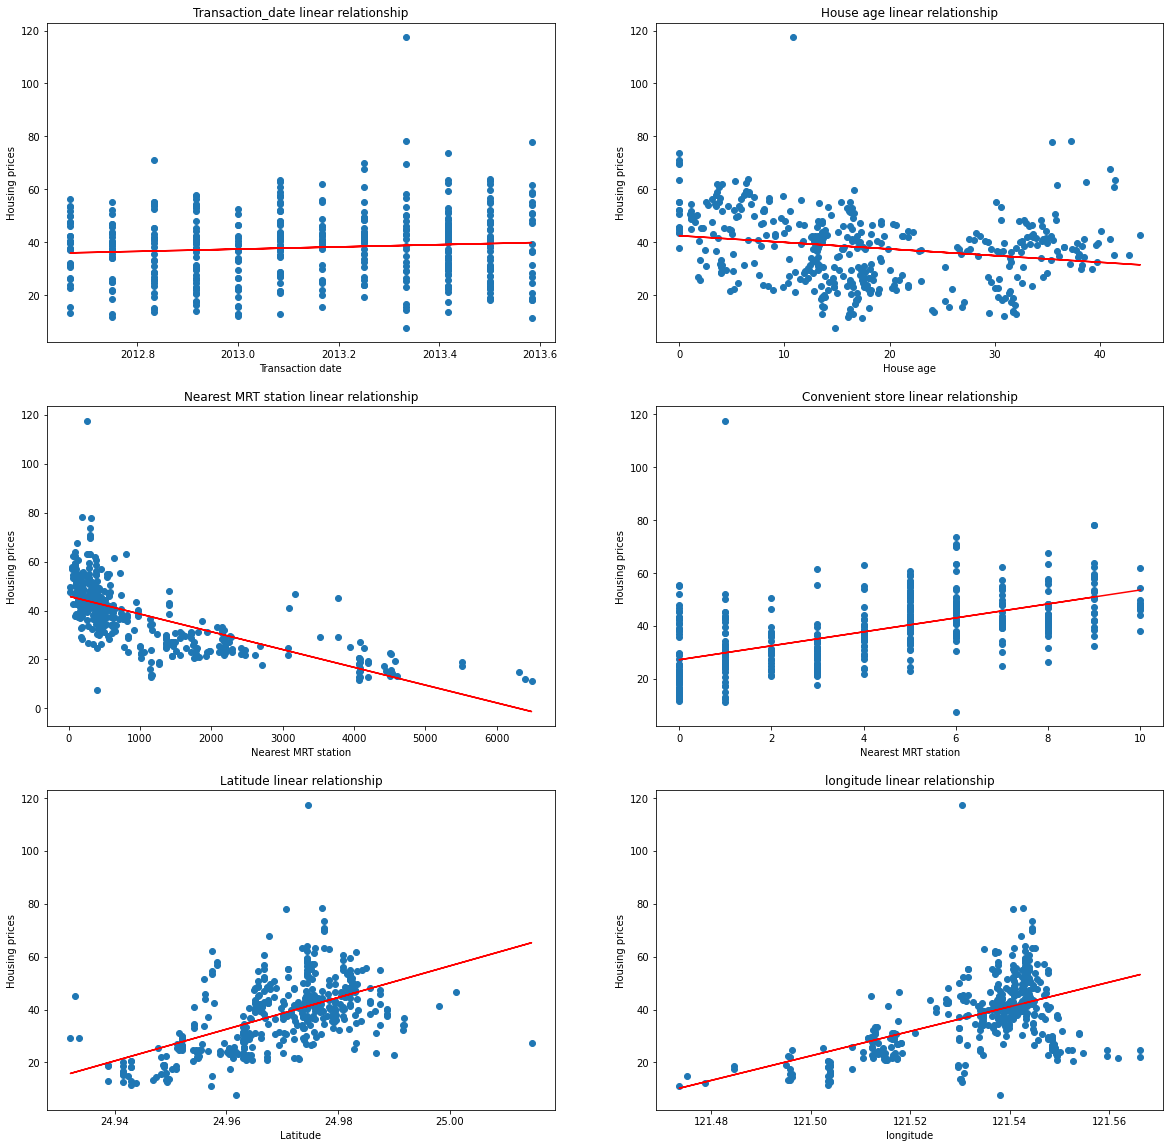

In [13]:
#Finding linear relationship between independent and dependent feature variables
fig,((ax00,ax01),
     (ax10,ax11),
     (ax20,ax21)) = plt.subplots(3, 2, figsize=(20, 20))
from sklearn.linear_model import LinearRegression

#finding linear relationship of Transaction_date wrt Housing prices
x1 = house_data.iloc[:,1].values.reshape(-1,1)
y1 = house_data.iloc[:,7].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x1,y1)
y1_preds = lr.predict(x1)
ax00.scatter(x1,y1)
ax00.plot(x1,y1_preds,color='red')
ax00.set(title="Transaction_date linear relationship",xlabel="Transaction date",ylabel = "Housing prices")

# finding linear relationship  of house_age wrt Housing_prices
x2 = house_data.iloc[:,2].values.reshape(-1,1)
y1 = house_data.iloc[:,7].values.reshape(-1,1)
lr.fit(x2,y1)
y1_preds = lr.predict(x2)
ax01.scatter(x2,y1)
ax01.plot(x2,y1_preds,color='red')
ax01.set(title="House age linear relationship",xlabel="House age",ylabel = "Housing prices")


#finding linear relationship of Nearest_MRT_station wrt Housing prices
x3 = house_data.iloc[:,3].values.reshape(-1,1)
y1 = house_data.iloc[:,7].values.reshape(-1,1)
lr.fit(x3,y1)
y1_preds = lr.predict(x3)
ax10.scatter(x3,y1)
ax10.plot(x3,y1_preds,color='red')
ax10.set(title="Nearest MRT station linear relationship",xlabel="Nearest MRT station",ylabel = "Housing prices")

#finding linear relationship  of Convenient_stores wrt Housing prices
x4= house_data.iloc[:,4].values.reshape(-1,1)
y1 = house_data.iloc[:,7].values.reshape(-1,1)
lr.fit(x4,y1)
y1_preds = lr.predict(x4)
ax11.scatter(x4,y1)
ax11.plot(x4,y1_preds,color='red')
ax11.set(title="Convenient store linear relationship",xlabel="Nearest MRT station",ylabel = "Housing prices")

#finding linear relationship of latitude wrt Housing prices
x5= house_data.iloc[:,5].values.reshape(-1,1)
y1 = house_data.iloc[:,7].values.reshape(-1,1)
lr.fit(x5,y1)
y1_preds = lr.predict(x5)
ax20.scatter(x5,y1)
ax20.plot(x5,y1_preds,color='red')
ax20.set(title="Latitude linear relationship",xlabel="Latitude",ylabel = "Housing prices")

#finding linear relationship  of longitude wrt Housing prices
x6 = house_data.iloc[:,6].values.reshape(-1,1)
lr.fit(x6,y1)
y1_preds = lr.predict(x6)
ax21.scatter(x6,y1)
ax21.plot(x6,y1_preds,color='red')
ax21.set(title="longitude linear relationship",xlabel="longitude",ylabel = "Housing prices");



#### 2.  Check for homoscedasticity

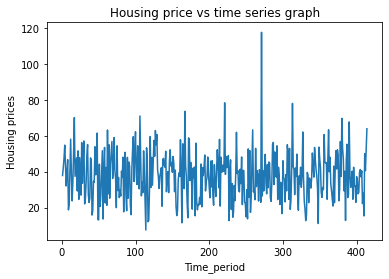

In [14]:
#Check for Homoscedasticity
house_data["Time_period"]=range(1,len(house_data)+1)
 
                            

plt.plot(house_data["Time_period"],house_data["Housing_price"])
plt.title("Housing price vs time series graph")
plt.xlabel("Time_period")
plt.ylabel("Housing prices")
plt.show()

In [15]:
house_data.head()

,No,Transaction_date,House_age,Nearest_MRT_station,Convenient_stores,latitude,longitude,Housing_price,Time_period
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,1
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,4
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,5


In [16]:
house_data.drop("Time_period",axis=1,inplace=True)

In [17]:
house_data.head()

,No,Transaction_date,House_age,Nearest_MRT_station,Convenient_stores,latitude,longitude,Housing_price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


#### 3.  Check for Multicollinearity

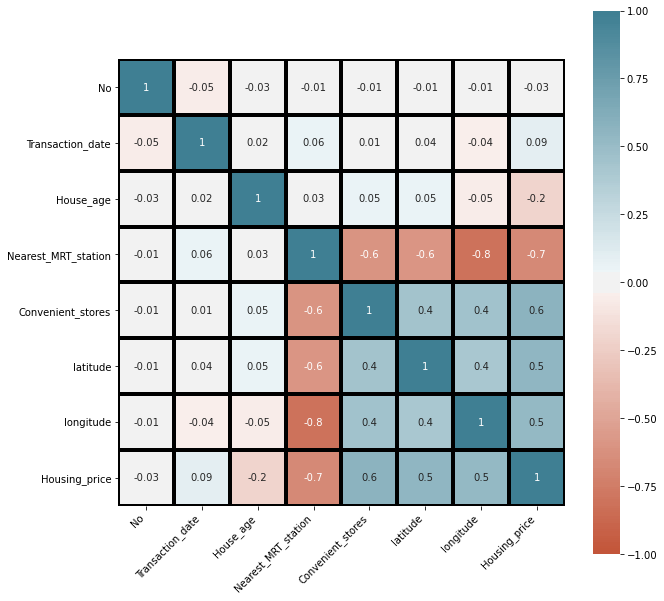

In [18]:
#correlation matrix: Checking of multicollinearity
corr = house_data.corr()
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    annot = True,
    fmt='.1g',
    vmin=-1, vmax=1, center=0,
    linewidths=3,
    linecolor='black',
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Getting the Data Ready i.e X and Y

In [19]:
#getting the data ready
#x = predictor variables
#y = target variable
x = house_data.drop("Housing_price",axis=1)
y = house_data["Housing_price"]

In [20]:
x.head()

,No,Transaction_date,House_age,Nearest_MRT_station,Convenient_stores,latitude,longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [21]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Housing_price, dtype: float64

### Splitting the Data

In [22]:
#splitting the data
np.random.seed(42)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)



### Feature Scaling

In [23]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

### Modelling

In [24]:
#modelling
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Making Predictions

In [25]:
#making predictions
y_preds = lr.predict(x_test)

df = pd.DataFrame({"actual values":y_test[:21],
                  "Predicted values":y_preds[:21]})
df

,actual values,Predicted values
358,45.1,47.046459
350,42.3,40.407830
373,52.2,43.374640
399,37.3,39.206004
369,22.8,26.628180
72,36.3,45.892396
262,53.0,44.338889
140,51.4,46.744485
93,16.1,24.432352
70,59.0,55.062585


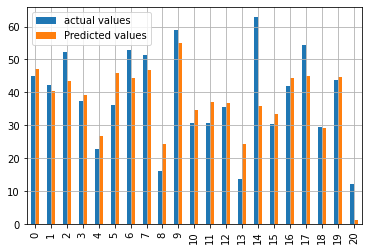

In [26]:
#visualizing the predictions
#making predictions
y_preds = lr.predict(x_test)
y1_preds=np.array(y_preds)
y1_test=np.array(y_test)
df1 = pd.DataFrame({"actual values":y1_test[:21].flatten(),
                  "Predicted values":y1_preds[:21].flatten()})
df1.plot(kind="bar")
plt.grid(which="major")
plt.show()

### Evaluating the Model

In [27]:
#evaluating our model through different metrics of regression
lr.score(x_test,y_test)

0.6745228670350768

In [28]:
#comparing predictions to truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)


5.418035098629008

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_preds)


54.60196067337886

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x,y,cv=5)

array([0.71111845, 0.52262859, 0.66295326, 0.44130702, 0.5846813 ])

### Optimizing the model through backward elimination

In [31]:
#optimizing the model using backward elimination
import statsmodels.api as sm


In [32]:
#adding the constant value B_0 in equation of multiple linear equations
x=np.append(arr=np.ones((414,1)).astype(int),values=x,axis=1)

In [33]:
d = pd.DataFrame(x)

In [34]:
d.head()

,0,1,2,3,4,5,6,7
0,1.0,1.0,2012.917,32.0,84.87882,10.0,24.98298,121.54024
1,1.0,2.0,2012.917,19.5,306.59470,9.0,24.98034,121.53951
2,1.0,3.0,2013.583,13.3,561.98450,5.0,24.98746,121.54391
3,1.0,4.0,2013.500,13.3,561.98450,5.0,24.98746,121.54391
4,1.0,5.0,2012.833,5.0,390.56840,5.0,24.97937,121.54245


##### Started Backward elimination

In [35]:
#Taking significance level = 0.05
x_opt=x[:,[1,2,3,4,5,6,7]]
lr_OLS=sm.OLS(endog=y,exog=x_opt).fit()
lr_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Housing_price   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1159.
Date:                Fri, 27 Nov 2020   Prob (F-statistic):                   2.80e-264
Time:                        22:47:24   Log-Likelihood:                         -1488.6
No. Observations:                 414   AIC:                                      2991.
Df Residuals:                     407   BIC:                                      3019.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0040      0.004     -1.105      0.270      -0.011       0.003
x2             3.7082      1.416      2.618      0.009       0.924       6.492
x3            -0.2721      0.039     -7.030      0.000      -0.348      -0.196
x4            -0.0055      0.001    -10.134      0.000      -0.007      -0.004
x5             1.1247      0.189      5.952      0.000       0.753       1.496
x6           203.1030     43.513      4.668      0.000     117.566     288.640
x7          -102.7824     23.311     -4.409      0.000    -148.607     -56.958
==============================================================================
Omnibus:                      226.807   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3409.172
Skew:                           1.979   Prob(JB):                         0.00
Kurtosis:                      16.489   Cond. No.                     2.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
# Elimination 1
x_opt=x[:,[2,3,4,5,6,7]]
lr_OLS = sm.OLS(endog=y,exog=x_opt).fit()
lr_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Housing_price   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1351.
Date:                Fri, 27 Nov 2020   Prob (F-statistic):                   1.34e-265
Time:                        22:47:24   Log-Likelihood:                         -1489.3
No. Observations:                 414   AIC:                                      2991.
Df Residuals:                     408   BIC:                                      3015.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.7401      1.416      2.641      0.009       0.956       6.524
x2            -0.2708      0.039     -6.999      0.000      -0.347      -0.195
x3            -0.0055      0.001    -10.121      0.000      -0.007      -0.004
x4             1.1290      0.189      5.975      0.000       0.758       1.501
x5           203.3142     43.524      4.671      0.000     117.755     288.873
x6          -103.3604     23.311     -4.434      0.000    -149.185     -57.535
==============================================================================
Omnibus:                      223.806   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3262.680
Skew:                           1.954   Prob(JB):                         0.00
Kurtosis:                      16.186   Cond. No.                     2.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# Elimination 2
x_opt = x[:,[3,4,5,6,7]]
lr_OLS = sm.OLS(endog=y,exog=x_opt).fit()
lr_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Housing_price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1596.
Date:                Fri, 27 Nov 2020   Prob (F-statistic):                   1.01e-265
Time:                        22:47:24   Log-Likelihood:                         -1492.8
No. Observations:                 414   AIC:                                      2996.
Df Residuals:                     409   BIC:                                      3016.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2695      0.039     -6.914      0.000      -0.346      -0.193
x2            -0.0047      0.000    -10.306      0.000      -0.006      -0.004
x3             1.1579      0.190      6.093      0.000       0.784       1.531
x4           227.1115     42.890      5.295      0.000     142.798     311.425
x5           -46.3053      8.812     -5.255      0.000     -63.627     -28.984
==============================================================================
Omnibus:                      235.995   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3585.764
Skew:                           2.088   Prob(JB):                         0.00
Kurtosis:                      16.800   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# Elimination 3
x_opt = x[:,[4,5,6,7]]
lr_OLS = sm.OLS(endog=y,exog=x_opt).fit()
lr_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Housing_price   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              1780.
Date:                Fri, 27 Nov 2020   Prob (F-statistic):                   1.47e-257
Time:                        22:47:24   Log-Likelihood:                         -1515.7
No. Observations:                 414   AIC:                                      3039.
Df Residuals:                     410   BIC:                                      3055.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0050      0.000    -10.389      0.000      -0.006      -0.004
x2             1.0668      0.200      5.332      0.000       0.673       1.460
x3           203.2124     45.125      4.503      0.000     114.506     291.918
x4           -41.4289      9.271     -4.469      0.000     -59.654     -23.204
==============================================================================
Omnibus:                      199.634   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2347.984
Skew:                           1.744   Prob(JB):                         0.00
Kurtosis:                      14.133   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# Elimination 4
x_opt = x[:,[5,6,7]]
lr_OLS = sm.OLS(endog=y,exog=x_opt).fit()
lr_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Housing_price   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              1855.
Date:                Fri, 27 Nov 2020   Prob (F-statistic):                   1.97e-238
Time:                        22:47:24   Log-Likelihood:                         -1564.0
No. Observations:                 414   AIC:                                      3134.
Df Residuals:                     411   BIC:                                      3146.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1771      0.190     11.465      0.000       1.804       2.550
x2           330.6415     48.749      6.782      0.000     234.813     426.470
x3           -67.6911     10.013     -6.760      0.000     -87.375     -48.008
==============================================================================
Omnibus:                      174.683   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1603.718
Skew:                           1.546   Prob(JB):                         0.00
Kurtosis:                      12.133   Cond. No.                     1.18e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# Elimination 5
x_opt = x[:,[6,7]]
lr_OLS = sm.OLS(endog=y,exog=x_opt).fit()
lr_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Housing_price   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              2063.
Date:                Fri, 27 Nov 2020   Prob (F-statistic):                   2.20e-215
Time:                        22:47:24   Log-Likelihood:                         -1621.5
No. Observations:                 414   AIC:                                      3247.
Df Residuals:                     412   BIC:                                      3255.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           530.1555     52.251     10.146      0.000     427.444     632.866
x2          -108.6079     10.735    -10.117      0.000    -129.710     -87.506
==============================================================================
Omnibus:                       85.175   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.351
Skew:                           0.931   Prob(JB):                     1.45e-58
Kurtosis:                       6.461   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# Combination 1
x_opt = x[:,[2,5]]
lr_OLS = sm.OLS(endog=y,exog=x_opt).fit()
lr_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Housing_price   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              2487.
Date:                Fri, 27 Nov 2020   Prob (F-statistic):                   1.05e-230
Time:                        22:47:24   Log-Likelihood:                         -1586.0
No. Observations:                 414   AIC:                                      3176.
Df Residuals:                     412   BIC:                                      3184.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0135      0.000     28.859      0.000       0.013       0.014
x2             2.6376      0.187     14.118      0.000       2.270       3.005
==============================================================================
Omnibus:                      171.926   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1417.263
Skew:                           1.553   Prob(JB):                    1.76e-308
Kurtosis:                      11.516   Cond. No.                         684.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Combination 2
x_opt = x[:,[1,2,3,4]]
lr_OLS = sm.OLS(endog=y,exog=x_opt).fit()
lr_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Housing_price   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              1679.
Date:                Fri, 27 Nov 2020   Prob (F-statistic):                   1.13e-252
Time:                        22:47:24   Log-Likelihood:                         -1527.0
No. Observations:                 414   AIC:                                      3062.
Df Residuals:                     410   BIC:                                      3078.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0050      0.004     -1.253      0.211      -0.013       0.003
x2             0.0253      0.001     39.393      0.000       0.024       0.027
x3            -0.2328      0.042     -5.539      0.000      -0.315      -0.150
x4            -0.0072      0.000    -19.028      0.000      -0.008      -0.006
==============================================================================
Omnibus:                      164.633   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1379.338
Skew:                           1.465   Prob(JB):                    3.02e-300
Kurtosis:                      11.449   Cond. No.                         210.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### After Trying Different Combinations and comparisons the optimization made below looked like the best fit 

In [43]:
#BEST COMBINATION POSSIBLE
x_opt = x[:,[1,2,4]]
lr_OLS = sm.OLS(endog=y,exog=x_opt).fit()
lr_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Housing_price   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                              2079.
Date:                Fri, 27 Nov 2020   Prob (F-statistic):                   6.02e-248
Time:                        22:47:24   Log-Likelihood:                         -1541.9
No. Observations:                 414   AIC:                                      3090.
Df Residuals:                     411   BIC:                                      3102.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0043      0.004     -1.037      0.300      -0.012       0.004
x2             0.0232      0.001     43.152      0.000       0.022       0.024
x3            -0.0073      0.000    -18.517      0.000      -0.008      -0.006
==============================================================================
Omnibus:                      142.637   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1033.357
Skew:                           1.272   Prob(JB):                    4.07e-225
Kurtosis:                      10.310   Cond. No.                         20.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### GUI DEVELOPMENT

In [44]:
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
import tkinter as tk
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [45]:
df = DataFrame(house_data, columns = ["No","Transaction_date","House_age","Nearest_MRT_station","Convenient_stores",
                                     "latitude","longitude","Housing_price"])

In [46]:
x=df[["No","Transaction_date","House_age","Nearest_MRT_station","Convenient_stores",
                                     "latitude","longitude"]]
y=df["Housing_price"]

In [47]:
#with sklearn
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [48]:
print("Intercept: \n",lr.intercept_)

Intercept: 
 38.39154078549896


In [49]:
print("coefficients: \n",lr.coef_)

coefficients: 
 [-0.65836938  1.52026712 -3.02917686 -5.85599241  3.18855211  2.81778333
 -0.45047249]


## With Statsmodel

In [50]:
#with statsmodels
model=sm.OLS(y,x).fit()
predictions = model.predict(x)

# Tkinter GUI

In [51]:
#tkinker GUI

In [52]:
root = tk.Tk()

In [53]:
canvas = tk.Canvas(root, width =1000, height = 300)

In [54]:
canvas.pack()

In [55]:
# with sklearn

In [56]:
Intercept_result = ("Intercept: ", "lr.intercept_")
label_intercept = tk.Label(root, text=Intercept_result,justify="center")
canvas.create_window(270,250,window=label_intercept)

1

In [57]:
#with sklearn 

In [58]:
Coefficients_result =("Coefficients: ","regressor.coef_")
label_Coefficients = tk.Label(root,text=Coefficients_result,justify="center")
canvas.create_window(260,270,window = label_Coefficients)

2

In [59]:
#with statsmodels

In [60]:
print_model = model.summary()
label_model = tk.Label(root,text=print_model,justify="center",relief="solid",anchor="e",bg="LightSkyBlue1")
canvas.create_window(700,220,window = label_model)

3

## Creating Label and Input Boxes

In [61]:
#New No. and input box
label0 =tk.Label(root,text="No: ")
canvas.create_window(185,80,window=label0)
#create zeroth entry box
entry0 = tk.Entry (root)
canvas.create_window(270,80,window=entry0)

#New Transaction_date and input box
label1 =tk.Label(root,text="Transaction_date: ")
canvas.create_window(156,100,window=label1)
#create first entry box
entry1 = tk.Entry (root)
canvas.create_window(270,100,window=entry1)

#New House_age and input box
label2 =tk.Label(root,text="House_age: ")
canvas.create_window(172,120,window=label2)
#create second entry box
entry2 = tk.Entry (root)
canvas.create_window(270,120,window=entry2)

#New Nearest_MRT_station and input box
label3 =tk.Label(root,text="Nearest_MRT_station: ")
canvas.create_window(147,140,window=label3)
#create third entry box
entry3 = tk.Entry (root)
canvas.create_window(270,140,window=entry3)

#New Convenient_stores and input box
label4 =tk.Label(root,text="Convenient_stores: ")
canvas.create_window(151,160,window=label4)
#create fourth entry box
entry4= tk.Entry (root)
canvas.create_window(270,160,window=entry4)

##New latitude and input box
label5=tk.Label(root,text="latitude: ")
canvas.create_window(181,180,window=label5)
#create fifth entry box
entry5 = tk.Entry (root)
canvas.create_window(270,180,window=entry5)

##New longitude and input box
label6=tk.Label(root,text="longitude: ")
canvas.create_window(176,200,window=label6)
#create sixth entry box
entry6 = tk.Entry(root)
canvas.create_window(270,200,window=entry6)

17

## User-Defined Functions to take New Values for Predictions

In [62]:
def values():
    global No
    New_No=int(entry0.get())
    
    global New_Transaction_date
    New_Transaction_date =float(entry1.get())
    
    global New_House_age
    New_House_age = float(entry2.get())
    
    global New_Nearest_MRT_station
    New_Nearest_MRT_station = float(entry3.get())
    
    global New_Convenient_stores
    New_Convenient_stores = int(entry4.get())
    
    global New_latitude
    New_latitude = float(entry5.get())
    
    global New_longitude
    New_longitude = float(entry6.get())
    
    Prediction_result = ("Predicted Housing_Price",model.predict([[New_No,New_Transaction_date,New_House_age,
                                                               New_Nearest_MRT_station,New_Convenient_stores,
                                                                New_latitude,New_longitude]]))
    label_prediction = tk.Label(root,text="Prediction_result:",bg="orange")
    canvas.create_window(120,300,window=label_prediction)
    label_prediction.config(text=Prediction_result)
    

    

In [63]:
#button to call the "values" command above
button1 = tk.Button(root,text="Predict Housing Prices",command=values,bg="orange")
canvas.create_window(270,220,window=button1)


18

In [64]:
root.mainloop()